In [1]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/colab_notebooks/dydaktyka/sip/5_shapely

/content/gdrive/MyDrive/colab_notebooks/dydaktyka/sip/5_shapely


In [3]:
ls

analiza_danych_shapely_w1_v2.ipynb  budynki_multi.csv


In [5]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 71.6 MB/s eta 0:00:00


In [135]:
import os
#import fiona
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import geopandas as gpd
import pandas as pd
import json
import pyproj
from shapely.geometry import Point, LineString, Polygon
from shapely import wkt
from shapely.ops import transform

# Tworzenie obiektów wektorowych za pomocą biblioteki shapely

In [7]:
punkt1=(204376,627861) #współrzędne pojedynczego punktu w układzie współrzędnych 1992 EPSG:2180
punkt2=(14.54771042, 53.43268351) #współrzędne pojedynczego punktu w układzie współrzędnych wgs84 EPSG:4326 (GPS)
punkt3=(1,1) #współrzędna kartezjańska np. współrzędne piksela

In [8]:
print(punkt2)

(14.54771042, 53.43268351)


# Generowanie geometrii WKT za pomocą shapely

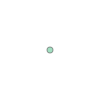

In [9]:
punkt=Point(punkt1)
punkt

In [10]:
punkt.has_z #sprawdzenie czy jest wartość z

False

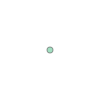

In [11]:
punkt3d = Point(14.54771042, 53.43268351, 14.7) #wysokość punktu 14.7
punkt3d

In [12]:
punkt3d.has_z #sprawdzenie czy jest wartość z

True

In [13]:
punkt1=(204376,627861)
type(punkt1) #typ obiektu - niezmienialny

tuple

In [16]:
punkt1[0] = (204378,627862) #krotki (tuple) w odróżnieniu od listy nie jesteśmy w stanie uzupełnić danymi ani jej zmienić
#przy wykonaniu wyskoczy błąd

TypeError: ignored

In [17]:
punkt1=[[204376,627861]]
type(punkt1) #typ obiektu 
print(punkt1)

[[204376, 627861]]


In [18]:
punkt1.append([205378,628862]) #typ list możemy zmieniać i uzupełniać danymi

print(punkt1)

[[204376, 627861], [205378, 628862]]


In [19]:
type(punkt1) #typ obiektu 

list

In [20]:
punkt=Point(punkt1[0])
type(punkt) #typ obiektu

shapely.geometry.point.Point

In [22]:
points = [Point(punkt1[0]), Point(punkt1[1])]
type(points)
print(points)

[<POINT (204376 627861)>, <POINT (205378 628862)>]


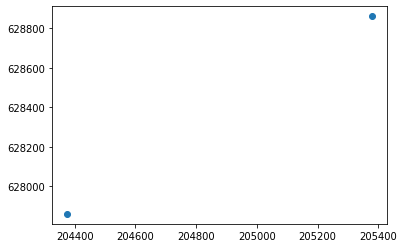

In [23]:
xs = [point.x for point in points]
ys = [point.y for point in points]
plt.scatter(xs, ys)

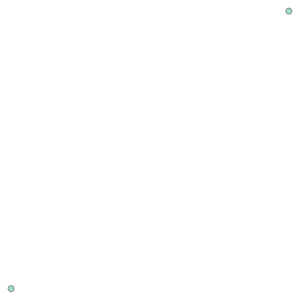

In [24]:
from shapely.geometry import MultiPoint
MultiPoint(points)

In [25]:
list(punkt.coords) #wyświetlenie coordynatów punktu

[(204376.0, 627861.0)]

In [26]:
punkt1=Point(204376,627861) #współrzędne pojedynczego punktu w układzie współrzędnych 1992 EPSG:2180
punkt2=Point(204396,627811)
punkt3=Point(14.54771042, 53.43268351) #współrzędne pojedynczego punktu w układzie współrzędnych WGS84 EPSG:4326
print(round(punkt1.distance(punkt2),2),'m') #odległość pomiędzy punktami Musi być ten sam układ współrzędnych

53.85 m


# Generowanie linii

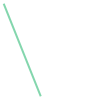

In [27]:
linia = LineString([punkt1, punkt2]) #n wierzchołków w postaci tablicy
linia

In [28]:
type(linia)

shapely.geometry.linestring.LineString

In [29]:
list(linia.coords)

[(204376.0, 627861.0), (204396.0, 627811.0)]

In [30]:
xcoords = list(linia.xy[0])
ycoords = list(linia.xy[1])
print(xcoords,ycoords) #możliwa iteracja

[204376.0, 204396.0] [627861.0, 627811.0]


In [31]:
print(round(linia.length,2),"m") #linia posiada długość jako atrybut geometrii

53.85 m


# Generowanie polygonu:

In [32]:
punkt1=Point(204376,627861) #współrzędne pojedynczego punktu w układzie współrzędnych 1992 EPSG:2180
punkt2=Point(204396,627861)
punkt3=Point(204396,627811)
punkt4=Point(204376,627811)
polygon = Polygon([punkt1, punkt2,punkt3,punkt4])

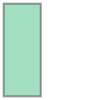

In [33]:
polygon

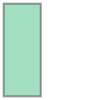

In [34]:
polygon = Polygon([[p.x, p.y] for p in [punkt1, punkt2, punkt3,punkt4]]) #tworzenie polygonu metodą iteracji
polygon

# Gotowa definicja WKT

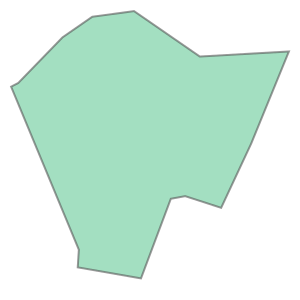

In [35]:
polygon1=wkt.loads('Polygon ((204525.05 626993.47, 204219.86 627046.75, 204225.19 627131.91, 203898.25 627918.83, 203932.8 627936.68, 204146.52 628156.93, 204289.82 628256.23, 204491.43 628283.51, 204809.01 628064.23, 205238.93 628088.68, 205056.98 627644.16, 204911.95 627334.07, 204738.38 627390.5, 204669.03 627377.73, 204525.05 626993.47))')
polygon2=wkt.loads('Polygon ((204371.52 628148.42, 204170.55 628003.35, 203981.56 627433.7, 204198.5 627171.5, 204760.16 627517.55, 204706.92 627988.71, 204371.52 628148.42))')
xxx=Polygon(shell=polygon1)
polygon1

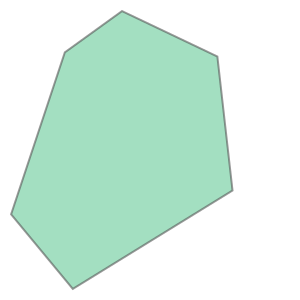

In [36]:
polygon2

# Operacje geometrii

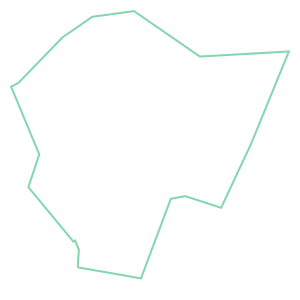

In [37]:
polygon1.union(polygon2).boundary #złączenie

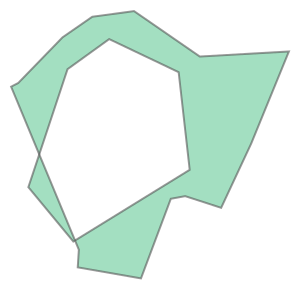

In [38]:
polygon1.symmetric_difference(polygon2) #różnica

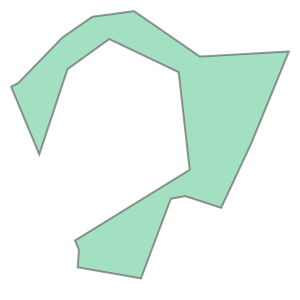

In [39]:
polygon1.difference(polygon2) #różnica

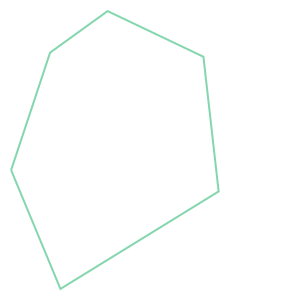

In [40]:
polygon1.intersection(polygon2).boundary #przecięcie

In [41]:
polygon1.overlaps(polygon2) #Zwraca True jeśli geometrie mają więcej niż jeden, ale nie wszystkie punkty wspólne

True

In [42]:
polygon1.touches(punkt1) #Zwraca True, jeśli obiekty mają przynajmniej jeden punkt wspólny, a ich wnętrza nie przecinają się z żadną częścią drugiego obiektu.

False

In [43]:
punkt1=wkt.loads('Point (204376.84 627862.61)')
punkt1.within(polygon1) #Zwraca True jeśli granica i wnętrze obiektu przecinają się tylko z wnętrzem drugiego obiektu

True

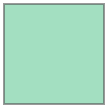

In [44]:
punkt1.buffer(50,resolution=20, cap_style=3, join_style=1, mitre_limit=5.0, single_sided=False)

# cap_style:
    1-koło
    2-płaski
    3-kwadrat

# join_style:
    1-okrągłe
    2-ukośnie
    3-skośnie

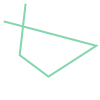

In [46]:
linia=wkt.loads('LineString (-0.67603306 0.78842975, -0.78181818 -0.13553719, -0.2661157 -0.52066116, 0.59338843 0.03305785, -1.06942149 0.47107438)')
linia

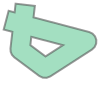

In [47]:
bufor=linia.buffer(0.2,resolution=4, cap_style=2, join_style=1)
bufor

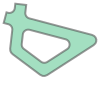

In [48]:
bufor2 = bufor.buffer(-0.1)
bufor2

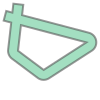

In [49]:
lewy = linia.buffer(-0.2, single_sided=True)
lewy

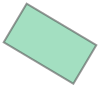

In [50]:
linia.minimum_rotated_rectangle #wpasowanie obiektu w prostokąt

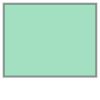

In [51]:
linia.envelope #Zwraca reprezentację punktu lub najmniejszego wielokąta prostokątnego (o bokach równoległych do osi współrzędnych), który zawiera obiekt.

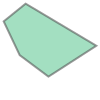

In [52]:
linia.convex_hull #Zwraca reprezentację najmniejszego wielokąta zawierającego wszystkie punkty w obiekcie, chyba że liczba punktów w obiekcie jest mniejsza niż trzy

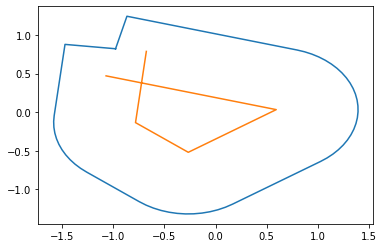

In [53]:
linia_source=wkt.loads('LineString (-0.67603306 0.78842975, -0.78181818 -0.13553719, -0.2661157 -0.52066116, 0.59338843 0.03305785, -1.06942149 0.47107438)')
linia_offset=linia_source.parallel_offset(0.8, resolution=16, join_style=1, mitre_limit=1) #oodsunięcie linii
x,y = linia_offset.xy
plt.plot(x,y)
x,y=linia_source.xy
plt.plot(x,y)


In [54]:
bufor=punkt1.buffer(100,resolution=100, cap_style=1, join_style=1, mitre_limit=5.0, single_sided=False) #bufor
bufor_simplify=bufor.simplify(20, preserve_topology=False)

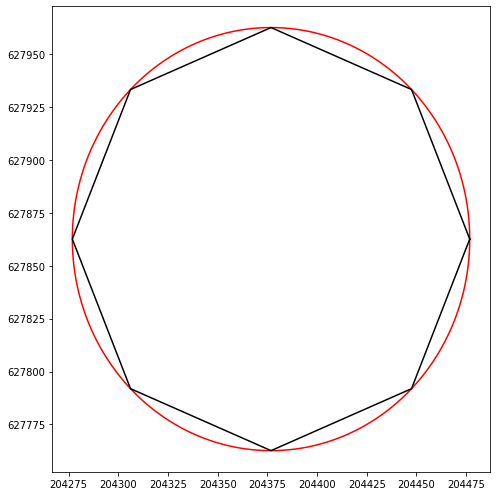

In [55]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True
x, y = bufor.exterior.xy
plt.plot(x, y, c="red")
x, y = bufor_simplify.exterior.xy
plt.plot(x, y, c="black")
plt.show()

# Konwersja typów struktur danych

In [66]:
import shapely.geometry as sg
import shapely.ops as so
import matplotlib.pyplot as plt

df=pd.read_csv('budynki_multi.csv', sep='\t') 
results = []
for index, row in df.iterrows():
    budynek=wkt.loads(row['wkt_geom'])
    print(row['wkt_geom'])
    results.append(wkt.loads(row['wkt_geom']))

MultiPolygon (((204435.33999999985098839 628091.05000000074505806, 204433.45000000018626451 628080.80000000074505806, 204431.87000000011175871 628081.06000000052154064, 204431.25 628077.74000000022351742, 204432.83000000007450581 628077.49000000022351742, 204432.54999999981373549 628076.01999999955296516, 204426.75999999977648258 628076.93999999947845936, 204427.01999999955296516 628078.55000000074505806, 204419.62000000011175871 628079.59999999962747097, 204419.07000000029802322 628085.35999999940395355, 204419.04999999981373549 628085.47000000067055225, 204418.13999999966472387 628092.16999999992549419, 204417.36000000033527613 628097.91999999992549419, 204427.59999999962747097 628099.21000000089406967, 204427.83999999985098839 628097.55000000074505806, 204433.70000000018626451 628091.33999999985098839, 204435.33999999985098839 628091.05000000074505806)))
MultiPolygon (((204562.58999999985098839 628208.99000000022351742, 204577.76999999955296516 628198.73000000044703484, 204570.32000

In [67]:
df.head()

,wkt_geom,typ_budynku
0,MultiPolygon (((204435.33999999985098839 62809...,biura i usługi
1,MultiPolygon (((204562.58999999985098839 62820...,biura i usługi
2,MultiPolygon (((204501.42999999970197678 62777...,biura i usługi
3,MultiPolygon (((204343.33999999985098839 62779...,biura i usługi
4,MultiPolygon (((204061.90000000037252903 62764...,biura i usługi


In [68]:
budynek=(results[7])
print(round(budynek.area,2),'sq m')


349.18 sq m


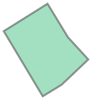

In [69]:
results[9]

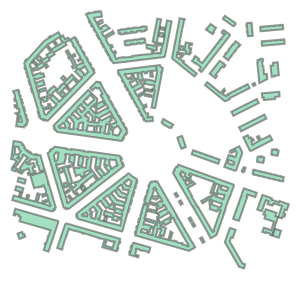

In [70]:
import shapely
polyout = shapely.ops.unary_union(results) #grupowanie geometrii
polyout

In [77]:
type(polyout)

shapely.geometry.multipolygon.MultiPolygon

In [84]:
polygon=list(polyout.geoms)

In [85]:
polygon

[<POLYGON ((204119.68 627620.54, 204119.94 627621.32, 204120.18 627621.23, 20...>,
 <POLYGON ((204059.38 627653.29, 204061.9 627646.38, 204064.89 627647.57, 204...>,
 <POLYGON ((204133.43 627721.51, 204135.31 627723.63, 204134.71 627724.3, 204...>,
 <POLYGON ((204056.35 627747.92, 204056.31 627747.76, 204052.08 627748.99, 20...>,
 <POLYGON ((204059.64 627759.33, 204056.65 627760.29, 204056.55 627759.94, 20...>,
 <POLYGON ((204066.15 627782.22, 204046.94 627787.83, 204049.95 627798.42, 20...>,
 <POLYGON ((204044.03 627841.76, 204043.45 627842.18, 204043.62 627842.37, 20...>,
 <POLYGON ((204065.72 627937.3, 204062.37 627932.98, 204062.47 627932.81, 204...>,
 <POLYGON ((204104.77 627960.12, 204103.51 627964.39, 204105.66 627965.02, 20...>,
 <POLYGON ((204099.2 628103.39, 204095.22 628098.94, 204087.42 628105.96, 204...>,
 <POLYGON ((204203.67 627668.37, 204226.79 627661.79, 204247.29 627655.85, 20...>,
 <POLYGON ((204250.99 627766.68, 204234.41 627753.87, 204218.58 627741.53, 20...>,
 <PO

In [88]:
lista = [poly.exterior.coords for poly in list(polyout.geoms)] # rozgrupowanie geometrii
lista

In [89]:
type(lista)

list

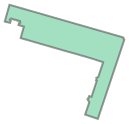

In [90]:
budynek=Polygon(lista[0]) #linia do polygon
budynek

In [91]:
type(budynek)

shapely.geometry.polygon.Polygon

In [92]:
type(budynek.exterior.xy) #linie zewnętrzne budynków

tuple

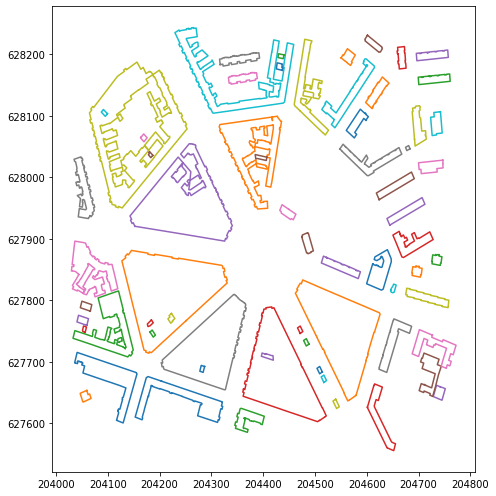

In [94]:
lista = [poly.exterior.coords for poly in list(polyout.geoms)]
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True
i=0
for x in lista:
    budynek=Polygon(lista[i])
    x, y = budynek.exterior.xy
    plt.plot(x, y)
    i+=1
plt.show()    

In [112]:
lista = [poly.exterior.coords for poly in list(polyout.geoms)]

i=0
export_wkt = []
for x in lista:
    budynek=Polygon(lista[i]) #linia do polygonu
    export_wkt.append(budynek)
    i+=1
print(export_wkt[0]) 


POLYGON ((204119.6799999997 627620.5399999991, 204119.9400000004 627621.3200000003, 204120.1799999997 627621.2300000004, 204120.8799999999 627623.4199999999, 204123.21999999974 627622.6400000006, 204128.53000000026 627638.8100000005, 204127.75999999978 627639.0700000003, 204128.40000000037 627640.9499999993, 204128.08000000007 627641.6699999999, 204130 627642.5899999999, 204134.91000000015 627657.3699999992, 204134.53000000026 627657.5, 204122.33999999985 627661.4900000002, 204121.95999999996 627661.5899999999, 204114.73000000045 627663.6699999999, 204105.41000000015 627666.3800000008, 204099.66000000015 627667.9299999997, 204094.33999999985 627669.4299999997, 204088.5599999996 627671.1300000008, 204072.11000000034 627675.8599999994, 204051.98000000045 627681.6699999999, 204055.2000000002 627693.1999999993, 204049.75999999978 627694.8100000005, 204050.4400000004 627697.0299999993, 204051.51999999955 627697.1500000004, 204051.29000000004 627698.6999999993, 204048.8200000003 627699.41999

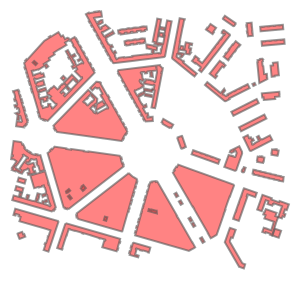

In [97]:
from shapely.geometry import MultiPolygon
MultiPolygon(export_wkt)

In [98]:
df = pd.DataFrame(export_wkt) #shapely do pandas dataframe
df.columns=['geometria']
df.head()

,geometria
0,"POLYGON ((204119.6799999997 627620.5399999991,..."
1,"POLYGON ((204059.3799999999 627653.2899999991,..."
2,"POLYGON ((204133.4299999997 627721.5099999998,..."
3,POLYGON ((204056.34999999963 627747.9199999999...
4,POLYGON ((204059.63999999966 627759.3300000001...


<Axes: >

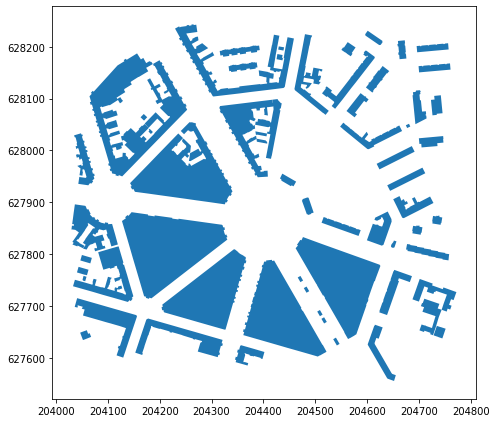

In [99]:
gdf = gpd.GeoDataFrame(df, geometry='geometria') #pandas dataframe do geopandas
gdf.plot()

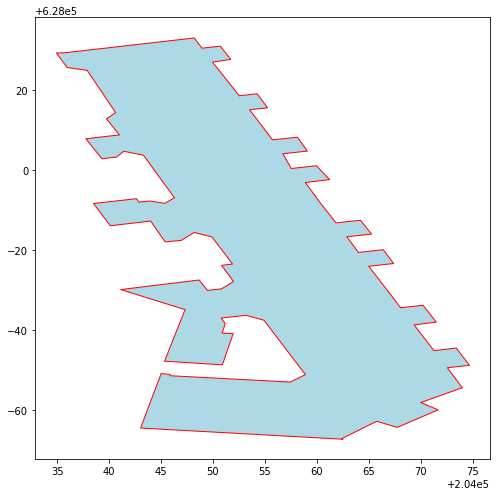

In [103]:
import numpy as np
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
def plot_polygon(ax, poly, **kwargs): 
    # * oznacza zmienną niemodyfikowalną typu krotka ** oznacza krotkę z przekazaniem klucz -> wartość
    path = Path.make_compound_path(
        Path(np.asarray(poly.exterior.coords)[:, :2]),
        *[Path(np.asarray(ring.coords)[:, :2]) for ring in poly.interiors])

    patch = PathPatch(path, **kwargs)
    collection = PatchCollection([patch], **kwargs)
    
    ax.add_collection(collection, autolim=True)
    ax.autoscale_view()
    return collection

fig, ax = plt.subplots()
plot_polygon(ax, polyout.geoms[7], facecolor='lightblue', edgecolor='red')

In [141]:
numpy_arr=np.array(polyout.geoms[7]) #konwersja do numpy
print(numpy_arr)

POLYGON ((204065.71999999974 627937.3000000007, 204062.3700000001 627932.9800000004, 204062.46999999974 627932.8100000005, 204042.98000000045 627935.6099999994, 204044.95999999996 627949.2300000004, 204045.8099999996 627949.0099999998, 204045.8200000003 627948.6899999995, 204051.54000000004 627947.9100000001, 204057.40000000037 627947.0999999996, 204058.84999999963 627948.9700000007, 204054.86000000034 627962.5600000005, 204053.13999999966 627963.7899999991, 204050.75 627963.1099999994, 204051.1299999999 627961.7200000007, 204050.83999999985 627959.3399999999, 204051.90000000037 627959.2100000009, 204050.86000000034 627951.4100000001, 204045.29000000004 627952.3200000003, 204045.65000000037 627954.6799999997, 204046.45999999996 627959.9700000007, 204047.26999999955 627965.2100000009, 204041.0700000003 627970.2200000007, 204048.6200000001 627972.6199999992, 204049.4299999997 627970.0099999998, 204050.78000000026 627970.4100000001, 204051.9299999997 627972.2300000004, 204050.78000000026 

In [154]:
type(numpy_arr)

numpy.ndarray

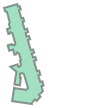

In [165]:
polygon = shapely.wkt.loads(str(numpy_arr)) #numpy do shapely
polygon


In [166]:
print(polygon.wkt)

POLYGON ((204065.71999999974 627937.3000000007, 204062.3700000001 627932.9800000004, 204062.46999999974 627932.8100000005, 204042.98000000045 627935.6099999994, 204044.95999999996 627949.2300000004, 204045.8099999996 627949.0099999998, 204045.8200000003 627948.6899999995, 204051.54000000004 627947.9100000001, 204057.40000000037 627947.0999999996, 204058.84999999963 627948.9700000007, 204054.86000000034 627962.5600000005, 204053.13999999966 627963.7899999991, 204050.75 627963.1099999994, 204051.1299999999 627961.7200000007, 204050.83999999985 627959.3399999999, 204051.90000000037 627959.2100000009, 204050.86000000034 627951.4100000001, 204045.29000000004 627952.3200000003, 204045.65000000037 627954.6799999997, 204046.45999999996 627959.9700000007, 204047.26999999955 627965.2100000009, 204041.0700000003 627970.2200000007, 204048.6200000001 627972.6199999992, 204049.4299999997 627970.0099999998, 204050.78000000026 627970.4100000001, 204051.9299999997 627972.2300000004, 204050.78000000026 

Różne warstwy na jednym rysunku

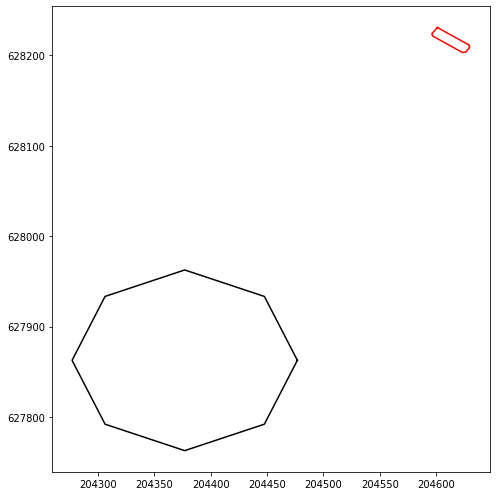

In [167]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True
x, y = budynek.exterior.xy
plt.plot(x, y, c="red")
x, y = bufor_simplify.exterior.xy
plt.plot(x, y, c="black")
plt.show()

# Zmiana układu współrzędnych

In [168]:
punkt=Point(204376,627861)

project = pyproj.Transformer.from_proj(
    pyproj.Proj(init='epsg:2180'), # source coordinate system
    pyproj.Proj(init='epsg:4326')) # destination coordinate system
p2 = transform(project.transform, punkt) 

/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [169]:
list(p2.coords)

[(14.547710420628315, 53.43268350598892)]

In [170]:
punkt=Point(204376,627861)

wgs84 = pyproj.CRS('EPSG:4326')
pl = pyproj.CRS('EPSG:2180')

project = pyproj.Transformer.from_crs(pl, wgs84, always_xy=True).transform
p2 = transform(project, punkt)

In [171]:
list(p2.coords)

[(14.547710420628315, 53.43268350598892)]

Zadania:
    1.  Zmień odwzorowanie warstwy budynki z EPSG:2180 do EPSG:4326 
    
    2.  Oblicz sumaryczną powierzchnię budynków z pliku csv w klasach. (ocena dostateczna)
    
    3.  Na podstawie danych z wykładu, zwizualizuj mapę wektorową w matplotlib na podstawie pliku budynki_multi.csv. 
    
        Uwaga!!!! Każda klas rodzaju budynku innym kolorem. Sprawdź dane. (ocena dobra)
        
    4. Na środku warstwy budynki wstaw punkt, wygeneruj bufor 150 m i sprawdź ile budynków znajuje się wewnątrz.
    
    5. W zasięgu warstwy budynki_multi.csv wygeneruj 100 losowych punktów za pomocą numpy, a następnie sprawdź czy 
       punkt znajduje się wenątrz czy na zewnątrz polygonu. Dane zwróć do pandas dataframe. (ocena bardzo dobra)